In [1]:
# Elementos dentro de la Celda 

tuberias = {
    "name": "tuberias",
    "type": "door",
}

escalera_tuberias = {
    "name": "escalera tuberias",
    "type": "key",
    "target": tuberias,
}

diana = {
    "name": "diana",
    "type": "furniture",
}

celda = {
    "name": "celda",
    "type": "room",
}


# Laboratorio de Xisca

xisca_lab = {
    "name": "xisca lab",
    "type": "room",
}

xisca = {
    "name": "xisca",
    "type": "furniture",
}

sistema_seguridad = {
    "name": "sistema de seguridad",
    "type": "door",
}

contraseña = {
    "name": "contraseña",
    "type": "key",
    "target": sistema_seguridad,
}

puerta_hall = {
    "name": "puerta hall",
    "type": "door",
}

# Cocina Xisca

xisca_cocina = {
    "name": "xisca cocina",
    "type": "room",
}

nevera = {
    "name": "nevera",
    "type": "furniture",
}

llave_puerta_hall = {
    "name": "llave puerta hall",
    "type": "key",
    "target": puerta_hall,
}

# Hall con Rudi

rudi = {
    "name": "rudi",
    "type": "furniture",
}

puerta_hall= {
    "name": "puerta hall",
    "type": "door",
}

puerta_final= {
    "name": "puerta final",
    "type": "door",
}

acertijo_rudi = {
    "name": "acertijo rudi",
    "type": "key",
    "target": puerta_final,
}

hall_rudi = {
    "name": "hall",
    "type": "room",
}

outside = {
  "name": "outside"
}


all_rooms = [celda, xisca_lab, xisca_cocina, hall_rudi, outside]

all_doors = [tuberias, sistema_seguridad, puerta_hall, puerta_final]

# Definir las relaciones entre objetos

object_relations = {
    "celda": [diana, tuberias],
    "diana": [escalera_tuberias],
    "tuberias": [celda, xisca_lab],
    "xisca lab": [tuberias, xisca, sistema_seguridad],
    "xisca":[contraseña],
    "sistema de seguridad":[xisca_lab, xisca_cocina],
    "xisca cocina":[nevera,  sistema_seguridad, puerta_hall],
    "nevera":[llave_puerta_hall],
    "puerta hall":[xisca_cocina, hall_rudi],
    "hall":[rudi,puerta_hall, puerta_final],
    "rudi":[acertijo_rudi],
    "puerta final":[hall_rudi, outside],
}

# define game state. Do not directly change this dict.
# Instead, when a new game starts, make a copy of this
# dict and use the copy to store gameplay state. This
# way you can replay the game multiple times.

INIT_GAME_STATE = {
    "current_room": celda,
    "keys_collected": [],
    "target_room": outside
}

In [9]:
from IPython.display import Image, display

def imagen_hackout():
    # Usa barras inclinadas para la ruta del archivo o escapa las barras invertidas.
    display(Image(filename="/Users/sarasalmon/Desktop/IRONHACK/Data_Analytics/SEMANA 1/QUEST/Hackout.jpeg"))



def linebreak():
    """
    Print a line break
    """
    print("\n\n")
    
def start_game():
    """
    Start the game
    """
    imagen_hackout()
    print("""\n
    Te despiertas en una oscura celda con un escalofrío. 
    Diana, tu compañera de celda, te explica que estás en un centro de alta seguridad para personas con capacidades especiales:
    Estás en IronCrypt. 
    Dentro de sus muros, se encuentran los mejores hackers del mundo, atrapados por un sistema que, aún no lo sabe, pero los teme.
    Una antigua leyenda corre entre los reclusos: “Quien logre hackear el sistema de IronCrypt, se ganará la libertad.”
    Han estado haciendo experimentos contigo para comprobar si eres capaz de escapar. 
    De lo contrario, seguirán experimentando con tu cuerpo y tus capacidad y morirás!!!!! 
    Diana ha estado haciendo planos del edificio y tiene la esperanza de que tú seas el primero en poder escapar de IronCrypt 
    Y LIBERARLOS A TODOS 
    Suerte!
""")
    display(Image(filename="/Users/sarasalmon/Desktop/IRONHACK/Data_Analytics/SEMANA 1/QUEST/HACKOUT.jpg"))
    play_room(game_state["current_room"])

def play_room(room):
    """
    Play a room. First check if the room being played is the target room.
    If it is, the game will end with success. Otherwise, let player either
    explore (list all items in this room) or examine an item found here.
    """
    game_state["current_room"] = room
    if(game_state["current_room"] == game_state["target_room"]):
        print("Enhorabuena! Has conseguido salir de Ironcrypt!")
    else:
        print("Estás en " + room ["name"])
        intended_action = input("Qué quieres hacer? Escribe 'explorar' o 'examinar'?").strip()
        if intended_action == "explorar":
            explore_room(room)
            play_room(room)
        elif intended_action == "examinar":
            examine_item(input("¿Qué quieres examinar?").strip())
        else:
            print("Mmm no sé muy bien a qué te refieres. Escribe 'explorar' o 'examinar'.")
            play_room(room)
        linebreak()

def explore_room(room):
    """
    Explore a room. List all items belonging to this room.
    """
    items = [i["name"] for i in object_relations[room["name"]]]
    print("Has explorado " + room["name"] + ". Has encontrado " + ", ".join(items))

    # Diccionario con las descripciones de cada habitación
    descriptions = {
        "celda": "Las paredes son frías y húmedas. Diana tiene una escalera, con la que poder subir a las tuberías y moverte sin ser visto.",
        "xisca lab": "En el laboratorio de Xisca se escucha el repiquetear de las teclas fundido con música nueva. Xisca murmura mientras trabaja dos palabras 'caja mágica', lo que te da una idea de la contraseña",
        "xisca cocina": "La cocina de Xisca está limpia y llena de frutas. La nevera contiene una botella de vino tinto, bajo la que se encuentra la llave que te llevará más cerca de la salida",
        "hall": "Un amplio hall con techos altos. Rudi está ahí, listo para poner a prueba tus habilidades, proponiendote un todo o nada; o ganas y escapas o MUERES. Te propone el siguiente acertijo: 'Soy invisible, pero puedo romper sistemas. A menudo soy tu peor enemigo, pero también un aliado. Puedo robar datos o protegerlos. ¿Quién soy?'"
    }
    
    # Imprimir la descripción de la habitación
    print(descriptions.get(room["name"], "No hay mucha información aquí."))


def get_next_room_of_door(door, current_room):
    """
    From object_relations, find the two rooms connected to the given door.
    Return the room that is not the current_room.
    """
    connected_rooms = object_relations[door["name"]]
    for room in connected_rooms:
        if(not current_room == room):
            return room

def examine_item(item_name):
    """
    Examine an item which can be a door or furniture.
    First make sure the intended item belongs to the current room.
    Then check if the item is a door. Tell player if key hasn't been
    collected yet. Otherwise ask player if they want to go to the next
    room. If the item is not a door, then check if it contains keys.
    Collect the key if found and update the game state. At the end,
    play either the current or the next room depending on the game state
    to keep playing.
    """
    current_room = game_state["current_room"]
    next_room = ""
    output = None

    for item in object_relations[current_room["name"]]:
        if(item["name"] == item_name):
            output = "Has examinado " + item_name + ". "
            if(item["type"] == "door"):
                have_key = False
                for key in game_state["keys_collected"]:
                    if(key["target"] == item):
                        have_key = True
                if(have_key):
                    output += "Has conseguido pasar a la siguiente habitación!"
                    next_room = get_next_room_of_door(item, current_room)
                else:
                    output += "No es posible pasar a la siguiente habitación. Sigue intentándolo, ánimo!!!"
            else:
                if(item["name"] in object_relations and len(object_relations[item["name"]])>0):
                    item_found = object_relations[item["name"]].pop()
                    game_state["keys_collected"].append(item_found)
                    output += "Has encontrado " + item_found["name"] + "."
                else:
                    output += "Nada interesante por aquí."
            print(output)
            break

    if(output is None):
        print("El item que buscas no se encuentra en la habitación actual :S")

    if(next_room and input("Quieres ir a la siguiente habitación? Escribe 'si' o 'no'").strip() == 'si'):
        play_room(next_room)
    else:
        play_room(current_room)

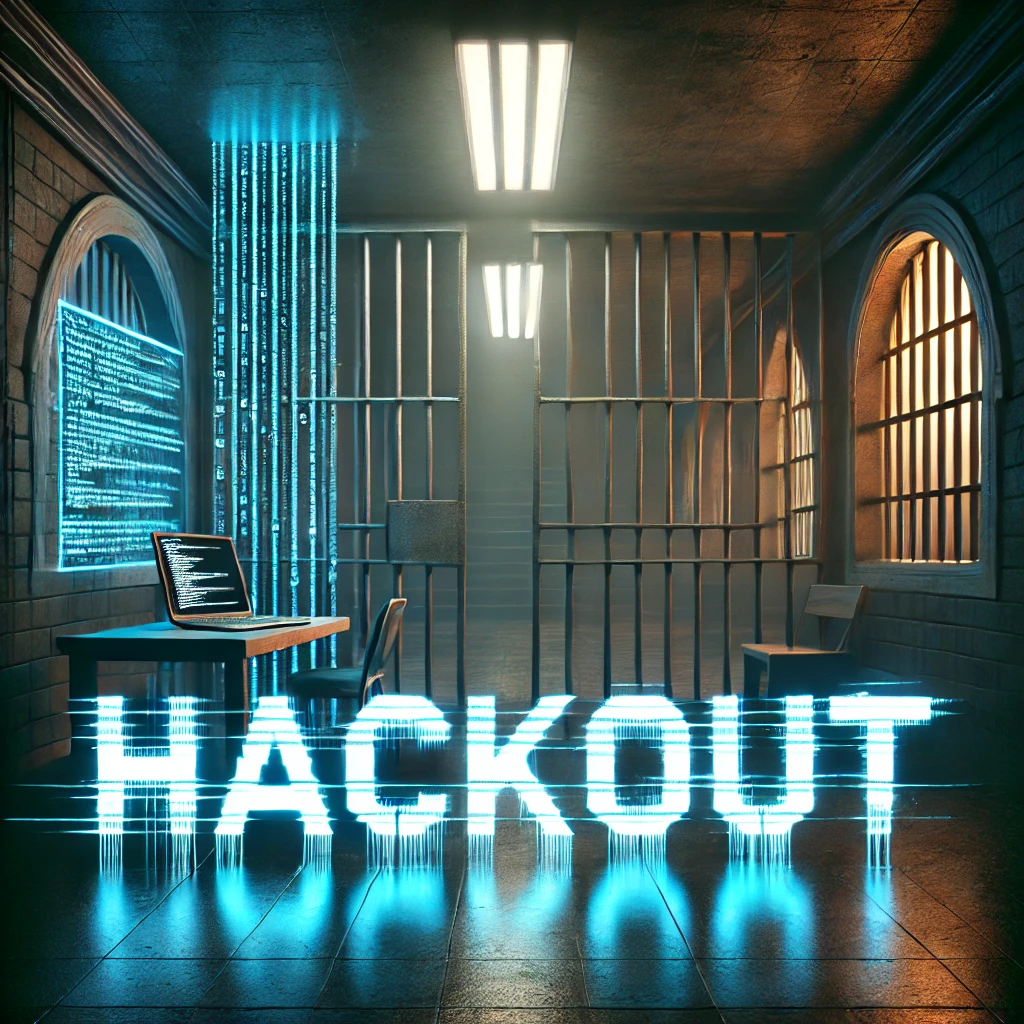



    Te despiertas en una oscura celda con un escalofrío. 
    Diana, tu compañera de celda, te explica que estás en un centro de alta seguridad para personas con capacidades especiales:
    Estás en IronCrypt. 
    Dentro de sus muros, se encuentran los mejores hackers del mundo, atrapados por un sistema que, aún no lo sabe, pero los teme.
    Una antigua leyenda corre entre los reclusos: “Quien logre hackear el sistema de IronCrypt, se ganará la libertad.”
    Han estado haciendo experimentos contigo para comprobar si eres capaz de escapar. 
    De lo contrario, seguirán experimentando con tu cuerpo y tus capacidad y morirás!!!!! 
    Diana ha estado haciendo planos del edificio y tiene la esperanza de que tú seas el primero en poder escapar de IronCrypt 
    Y LIBERARLOS A TODOS 
    Suerte!



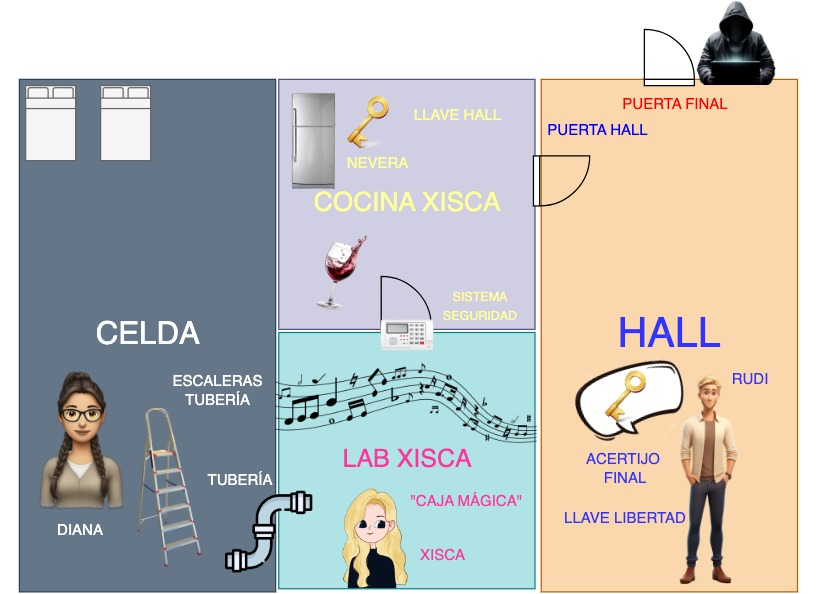

Estás en celda


In [ ]:
game_state = INIT_GAME_STATE.copy()

start_game()